In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)

In [3]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [10]:
class KMeans:
  def __init__(self, K=5, max_iters=100, plot_steps=False):
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    # list of samples indices for each cluster
    self.clusters = [[] for _ in range(self.K)]
    
    # mean feature vector for each cluster
    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    # initialize centroids
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
    self.centroids = [self.X[idx] for idx in random_sample_idxs]

    # optimization
    for _ in range(self.max_iters):
      # update clusters
      self.clusters = self._create_clusters(self.centroids)
      if self.plot_steps:
        self.plot()
      # update centroids
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)
      if self.plot_steps:
        self.plot()

      # check if converged
      if self._is_converged(centroids_old, self.centroids):
        break

    # return cluster labels
    return self._get_cluster_labels(self.clusters)

  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels

  def _create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx

  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids

  def _is_converged(self, centroids_old, centroids):
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0

  def plot(self):
    fig, ax = plt.subplots(figsize=(12, 8))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point, marker='x', color='black', linewidth=2)
    plt.show()

In [7]:
# Testing
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [11]:
X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=42)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

(500, 2)
4


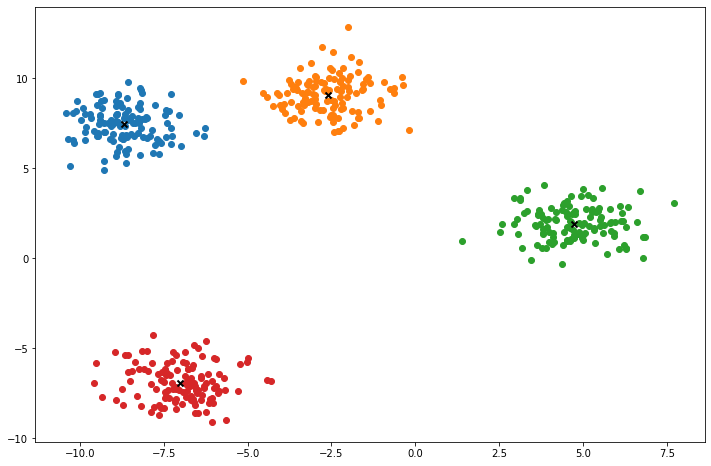

In [18]:
k = KMeans(K=clusters, max_iters=150, plot_steps=False)
y_pred = k.predict(X)
k.plot()